In [1]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
# %matplotlib qt 
import matplotlib.pyplot as plt
import matplotlib as mpl
from brokenaxes import brokenaxes
from load_files_pop import Z_200
from plot_search_results import (
    plot_hypervolumes_set,
    plot_pareto_front,
    plot_pareto_front3D,
    plot_1D_obj_scatter,
    plot_1D_obj_confidence_interval,
    plot_2D_obj_confidence_interval,
    plot_obj_progression_set
)
# from run_seed_comparisons import run_seed_results_comparisons

plt.style.use('/Users/kdreyer/Documents/Github/GraphGA/paper.mplstyle.py')
# orange_ = [i/255 for i in [230, 159, 0]]
# sky_blue = [i/255 for i in [86, 180, 233]]
# pink_ = [i/255 for i in [204, 121, 167]]
# bluish_green = [i/255 for i in [0, 158, 115]]
# vermillion = [i/255 for i in [213, 94, 0]]
# yellow_ = [i/255 for i in [240, 228, 66]]
# blue_ = [i/255 for i in [0, 114, 178]]
amp_blue = [i/255 for i in [102, 153, 204]]
amp_green = [i/255 for i in [17, 119, 51]]
amp_pink = [i/255 for i in [204, 102, 119]]
amp_dark_pink = [i/255 for i in [170, 68, 153]]
amp_yellow = [i/255 for i in [153, 153, 51]]
amp_maroon = [i/255 for i in [102, 17, 0]]

# colors = [orange_, sky_blue, pink_, bluish_green, vermillion, yellow_, blue_]

# blue, green, pink, dark pink, yellow, maroon
colors_amp = [amp_blue, amp_green, amp_pink, amp_dark_pink, amp_yellow, amp_maroon]
grey_ = [(i/255) for i in [150, 150, 150]]
# grey_2 = [(i/255) for i in [127, 127, 127]]
grey_2 = [(i/255) for i in [100, 100, 100]]
grey_3 = [(i/255) for i in [50, 50, 50]]

pulse_teal = [(i/255) for i in [68, 170, 153]]
pulse_pink = [(i/255) for i in [136, 34, 85]]
pulse_blue = [(i/255) for i in [51, 34, 136]]
pulse_light_blue = [(i/255) for i in [136, 204, 238]]
colors_pulse_single = [pulse_teal, pulse_pink, pulse_blue, pulse_light_blue]

combinatorial_yellow = [(i/255) for i in [221, 204, 119]]

Z_200_df = pd.DataFrame(data = Z_200, columns = ["plasmid_" + str(i) for i in range(9)])
Z_200_df = Z_200_df.drop(labels=["plasmid_" + str(i) for i in range(5,9)], axis=1)
Z_200_df["average"] = np.mean(Z_200_df, axis=1)



## Figure 2: Amplifier

### (b) Single cell model GA ON_rel progression 

In [ ]:
path_amplifier_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_single_cell/Original_hyperparams_vary_dose/"
results_runs_single = "Amplifier_single_cell_vary_dose_original_hp_seed_"
# run_seed_results_comparisons(path_amplifier_single, results_runs_single, 1, ["ON_rel"], 50, 0)

### (c) Population model GA ON_rel progression

In [ ]:
path_amplifier_pop = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/"
results_runs_pop = "Amplifier_pop_vary_dose_original_hp_seed_"
# run_seed_results_comparisons(path_amplifier_pop, results_runs_pop, 1, ["ON_rel"], 50, 0)

### (d) Population model GA search space and CI

In [ ]:
def plot_1D_CI_labeled(
        results_path: str,
        figure_path: str,
):
    labeled_CI_circuits = pd.read_csv(results_path+"labeled_CI_circuits.csv")
    labled_CI_circuit_variants = pd.read_csv(results_path+"labeled_CI_circuit_variants.csv")
    opt_objs = labeled_CI_circuits.drop(list(
        labeled_CI_circuits.filter(regex="topology")
        ), axis=1)
    opt_objs = opt_objs.drop(list(
        labeled_CI_circuits.filter(regex="doses")
        ), axis=1)
    opt_objs = opt_objs.drop(list(
        labeled_CI_circuits.filter(regex="Unnamed: 0")
        ), axis=1)
    # display(opt_objs)
    # display(opt_circuits_df_nonan)
    opt_variant_objs = labled_CI_circuit_variants.drop(list(
        labled_CI_circuit_variants.filter(regex="topology")
        ), axis=1)
    opt_variant_objs = opt_variant_objs.drop(list(
        labled_CI_circuit_variants.filter(regex="doses")
        ), axis=1)
    opt_variant_objs = opt_variant_objs.drop(list(
        labled_CI_circuit_variants.filter(regex="Unnamed: 0")
        ), axis=1)
    # display(opt_variant_objs)
    opt_objs_T = opt_objs.transpose()
    opt_objs_T["opt_topo"] = opt_objs_T.index
    # display(opt_objs_T)
    opt_variant_objs_T = opt_variant_objs.transpose()
    opt_variant_objs_T["opt_topo"] = opt_variant_objs_T.index

    opt_objs_plot = pd.melt(frame=opt_objs_T,
                            id_vars="opt_topo",
                            var_name="column_name",
                            value_name="ON_rel")
    opt_objs_plot.dropna(inplace=True)
    opt_variant_objs_plot = pd.melt(frame=opt_variant_objs_T,
                            id_vars="opt_topo",
                            var_name="column_name",
                            value_name="ON_rel")
    opt_variant_objs_plot.dropna(inplace=True)
    x_vals = [0]*len(opt_objs_plot)
    # print(len(x_vals))
    np.random.seed(0)
    jittered_x = x_vals + np.random.rand(
        len(x_vals))
    opt_objs_plot["jittered_x"] = jittered_x

    x_vals_var = [0]*len(opt_variant_objs_plot)
    jittered_x_var = x_vals_var + np.random.rand(
        len(x_vals_var))
    opt_variant_objs_plot["jittered_x"] = jittered_x_var

    fig, ax = plt.subplots(1, 1, figsize=(1.58, 1.825))
    sns.scatterplot(data= opt_objs_plot, x="jittered_x", y="ON_rel", ax=ax, hue="opt_topo", palette=colors_amp, s=15, legend=False)
    sns.scatterplot(data= opt_variant_objs_plot, x="jittered_x", y="ON_rel", ax=ax, hue="opt_topo", palette=[colors_amp[2], colors_amp[5]], marker= "+", s=20, legend=False)
    lower_bound = [63.11786016]*len(opt_objs_plot)
    upper_bound = [63.50911412131601]*len(opt_objs_plot)
    jittered_x.sort()
    ax.fill_between(jittered_x, lower_bound, upper_bound, alpha=0.15, color="grey", linewidth=0.1, zorder=3)
    ax.set_xticks([])
    ax.set_yticks([63.1, 63.2, 63.3, 63.4, 63.5])
    ax.set_ylim(bottom=63.1)
    ax.set_xlabel("")
    # plt.show()
    plt.savefig(results_path+"labeled_circuits_in_CI.svg", bbox_inches="tight")


In [ ]:
path = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/"
results_analysis = "2024-08-23_results_analysis_full_CI/"

# plot_1D_CI_labeled(path+results_analysis, "")

In [ ]:
path_amp_pop_results = path_amplifier_pop + "Amplifier_pop_vary_dose_original_hp_seed_0/"
path_Z_sampling = "Z_matrix_sampling/selected_high_ON_rel/"
Z_CI_fname= "Z_matrix_sampling_for_CI.pkl"
CI_Z_sampling = pd.read_pickle(path_amp_pop_results+path_Z_sampling+Z_CI_fname)
# display(CI_Z_sampling)
ON_rel_max = 63.50911412131601
CI_stderr = max(CI_Z_sampling["ON_rel_std_error"])

# plot_1D_obj_confidence_interval(path_amp_pop_results, path_amp_pop_results+path_Z_sampling+"CI_paper.svg", CI_stderr, ["ON_rel"], y_lim_bottom=0.0)

### (f) experimental data

In [ ]:
x_labels = [1, 2, 3, 4]
ON_rel_design = [62.706, 63.304, 36.275, 35.727]
ON_rel_test = [18.263, 18.475, 10.604, 10.523]
ON_rel_exp = [2.943, 2.456, 7.522, 6.928]
ON_rel_exp_stderr = [0.459, 0.383, 1.182, 1.301]

In [ ]:
experimental_data_path = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Experimental_data_&_planning/"
fig, ax = plt.subplots(1, 1, figsize=(2.25, 1.75), sharex=True, sharey=True)
xticks = []
for i in range(len(ON_rel_design)):
    ax.bar(i-0.25, ON_rel_design[i], color=grey_, width=0.225, align="center", label="design")
    ax.bar(i, ON_rel_test[i], color=grey_2, width=0.225, align="center", label="test")
    ax.bar(i+0.25, ON_rel_exp[i], color=grey_3, width=0.225, align="center", label="exp")
    (_, caps1, _) = ax.errorbar(i+0.25, ON_rel_exp[i], ON_rel_exp_stderr[i], color="k", capsize=1.5, elinewidth=0.5)
    for cap in caps1:
        cap.set_markeredgewidth(0.5)

    xticks.append(i)
ax.set_xticks(xticks)
ax.set_xticklabels(["1", "2", "3", "4"])
ax.set_xlabel("Amplifier topology")
ax.set_ylabel("ON_rel")
# plt.legend()
# plt.show()
# plt.savefig(experimental_data_path+"amplifier_experiment.svg")

## Supplementary Figure 1: Amplifier GA search space vs. combinatorial search

In [ ]:
path_amplifier_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_single_cell/Original_hyperparams_vary_dose/Amplifier_single_cell_vary_dose_original_hp_seed_0/"
fname_GA_single = "all_unique_obj.pkl"
path_amp_combinatorial = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Combinatorial_search/ON_rel_dsred0.pkl"

with open(path_amplifier_single+fname_GA_single, "rb") as fid:
    amp_GA_single = pickle.load(fid)
with open(path_amp_combinatorial, "rb") as fid:
    amp_combinatorial = pickle.load(fid)
amp_combinatorial = abs(amp_combinatorial)
amp_combinatorial.sort()
# print(amp_GA_single)
# print(amp_combinatorial)
# plot_1D_obj_scatter(path_amplifier_single+"GA_search_space_paper.svg", abs(amp_GA_single), ["ON_rel"])
# plot_1D_obj_scatter(path_amplifier_single+"GA_search_space_zoomed.svg", abs(amp_GA_single), ["ON_rel"], y_lower_lim=60)
# plot_1D_obj_scatter(path_amplifier_single+"combinatorial_search_paper.svg", abs(amp_combinatorial), ["ON_rel"], y_lower_lim=0.0)


## Supplementary Figure 2: Amplifier 20 vs 200-cell model ON_rel for single cell results

In [ ]:
path_amplifier_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_single_cell/Original_hyperparams_vary_dose/Amplifier_single_cell_vary_dose_original_hp_seed_0/"
path_high_obj = path_amplifier_single + "pop20v200_comparison_high/pop_model_comparisons.csv"
path_mid_obj = path_amplifier_single + "pop20v200_comparison_mid-range/pop_model_comparisons.csv"
path_low_obj = path_amplifier_single + "pop20v200_comparison_low/pop_model_comparisons.csv"

high_obj = pd.read_csv(path_high_obj)
mid_obj = pd.read_csv(path_mid_obj)
low_obj = pd.read_csv(path_low_obj)

all_objs = pd.concat([high_obj, mid_obj, low_obj])
all_objs.drop(["Unnamed: 0"], inplace=True, axis=1)
# display(all_objs)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
ax.plot(all_objs["20_cell"], all_objs["200_cell"], linestyle="none", marker="o", markersize="1.5", color="k")
ax.plot([0, 70], [0, 70], linestyle="dashed", color="k")
ax.set_xlabel("20-cell objective (ON_rel)")
ax.set_ylabel("200-cell objective (ON_rel)")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_box_aspect(1)
ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 20, 40, 60])
# plt.show()
# plt.savefig(path_amplifier_single+"20v200_parity_paper.svg", bbox_inches="tight")

## Supplementary Figure 3: Amplifier 20 vs 200-cell model ON_rel for 20-cell GA results

### CI objectives comparison

In [ ]:
def plot_CI_comparison(
        figure_path: str,
        objs_20: list,
        # objs_200: list,
        CI_max_20: float,
        CI_max_200: float
):

    np.random.seed(0)
    x_vals = [1]*len(objs_20)
    jittered_x = x_vals + 0.1*np.random.rand(
        len(x_vals))
    lower_bound_20 = [max(objs_20)-CI_max_20]*(len(objs_20))#+2)
    upper_bound_20 = [max(objs_20)]*(len(objs_20))#+2)
    lower_bound_200 = [max(objs_20)-CI_max_200]*(len(objs_20))#+2)
    upper_bound_200 = [max(objs_20)]*(len(objs_20))#+2)

    mpl.rcParams["figure.autolayout"] = False
    fig = plt.figure(figsize= (1.65, 1.95))
    bax = brokenaxes(ylims=((0, 0.025), (63.05, 63.55)), hspace=0.1)
    bax.plot(jittered_x, objs_20, linestyle="None",
             marker="o", markersize=1, color="black", zorder=0)
    # bax.plot(jittered_x, objs_200, linestyle="None",
    #          marker="o", markersize=1, color=grey_, zorder=1)
    x_CI_fill = jittered_x #np.append(jittered_x, [0.995, 1.105])
    x_CI_fill.sort()
    bax.fill_between(x_CI_fill, lower_bound_20, upper_bound_20, alpha=0.15, color="grey", zorder=2,
                    linewidth=0.25)
    bax.fill_between(x_CI_fill, lower_bound_200, upper_bound_200, alpha=0.15, color="k", zorder=3,
                linewidth=0.25)
    # bax.set_xticklabels([])
    # bax.set_xlim([0.995, 1.105])
    bax.axs[0].set_xticks([])
    bax.axs[1].set_xticks([])
    bax.set_ylabel("ON_rel")
    # bax.set_ylim(bottom=0)
    bax.axs[1].set_yticks([0])
    bax.axs[0].set_yticks([63.1, 63.2, 63.3, 63.4, 63.5])
    # plt.show()
    plt.savefig(figure_path, bbox_inches="tight")

In [ ]:
path_amp_pop = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/"
path_objs_20 = "2024-08-23_results_analysis_full_CI/selected_results_high_ON_rel.csv"
objs_20 = pd.read_csv(path_amp_pop+path_objs_20)["ON_rel"]
CI_stderr_20 = 0.39125398706065023
CI_stderr_200 = 0.17084631168330153
plot_CI_comparison(path_amp_pop+"CI_comparison_paper.svg", objs_20, CI_stderr_20, CI_stderr_200)

In [ ]:
path_amp_CI = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/pop200_comparison_CI/"
CI_fname = "pop_model_comparisons.csv"
ON_rel_comparison = pd.read_csv(path_amp_CI+CI_fname)
ON_rel_comparison.drop(["Unnamed: 0", "2000_cell"], axis=1, inplace=True)
# plot_CI_comparison(path_amp_CI+"CI_comparison_paper.svg", ON_rel_comparison["20_cell"].tolist(), ON_rel_comparison["200_cell"].tolist(), CI_stderr)

### all objectives parity

In [ ]:
path_amp_mid = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/pop200_comparison_mid-range/pop_model_comparisons.csv"
path_amp_low = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/pop200_comparison_low/pop_model_comparisons.csv"

ON_rel_mid = pd.read_csv(path_amp_mid)
ON_rel_mid.drop(["Unnamed: 0"], axis=1, inplace=True)

ON_rel_low = pd.read_csv(path_amp_low)
ON_rel_low.drop(["Unnamed: 0"], axis=1, inplace=True)

ON_rel_all = pd.concat([ON_rel_comparison, ON_rel_mid, ON_rel_low])

In [ ]:
path_amp_save = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/"

fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
ax.plot(ON_rel_all["20_cell"], ON_rel_all["200_cell"], linestyle="none", marker="o", markersize="1.5", color="k")
ax.plot([0, 70], [0, 70], linestyle="dashed", color="k")
ax.set_xlabel("20-cell objective (ON_rel)")
ax.set_ylabel("200-cell objective (ON_rel)")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_box_aspect(1)
ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 20, 40, 60])
plt.show()
# plt.savefig(path_amp_save+"20v200_parity_paper.svg", bbox_inches="tight")

## Figure 3: Signal conditioner

### (b) Single cell original hyperparameter pareto front

In [ ]:
path_sigcond_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Amplifier_optimized_hyperparams/run4_ngen10000/"
selected_seed_single = "2025-02-07_Signal_cond_single_DsRED_amp_hps_ngen10000_seed_1/"
pareto_obj_df = pd.read_pickle(path_sigcond_single+selected_seed_single+"final_objectives_df.pkl")
plot_pareto_front(path_sigcond_single+selected_seed_single+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (b) Single cell original hyperparameter hypervolume set

In [ ]:
path_sigcond_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Amplifier_optimized_hyperparams/run4_ngen10000/"
results_runs_single = "2025-02-07_Signal_cond_single_DsRED_amp_hps_ngen10000_seed_"
# run_seed_results_comparisons(path_sigcond_single, results_runs_single, 2, ["ON_rel", "FI_rel"], 10000, 1)

### (d) Single cell optimized hyperparameter pareto front

In [ ]:
path_sigcond_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Optimized_hyperparams_fixed_pop_max_hv_ngen50/run8_ngen10000_0/"
selected_seed_single_opt = "2025-01-14_Signal_cond_single_DsRED_opt_hps0_ngen10000_seed_3/"
pareto_obj_df = pd.read_pickle(path_sigcond_single_opt+selected_seed_single_opt+"final_objectives_df.pkl")
plot_pareto_front(path_sigcond_single_opt+selected_seed_single_opt+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (d) Single cell optimized hyperparameter hypervolume set

In [ ]:
path_sigcond_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Optimized_hyperparams_fixed_pop_max_hv_ngen50/run8_ngen10000_0/"
results_runs_single_opt = "2025-01-14_Signal_cond_single_DsRED_opt_hps0_ngen10000_seed_"
# run_seed_results_comparisons(path_sigcond_single_opt, results_runs_single_opt, 2, ["ON_rel", "FI_rel"], 10000, 3)

## ***Supplementary Figure 5: Signal Conditioner original hyperparameter solutions comparison for different hypervolumes

## ***Supplementary Figure 6: Signal Conditioner original hyperparameter with initial pop 200 and ratio 0.25 hypervolume set

## Supplementary Figure 7: Signal Conditioner GA search space vs. combinatorial search

In [ ]:
def plot_pareto_comparison(
        figure_path: str, 
        obj_df1: pd.DataFrame,
        obj_df2: pd.DataFrame,
        obj_labels: list,
):
        fig, ax = plt.subplots(1, 1, figsize= (1.955, 1.955))#(2.25, 2.25))
        sns.scatterplot(data=obj_df1, x= obj_df1[obj_labels[0]],
                        y= obj_df1[obj_labels[1]], 
                        # color=combinatorial_yellow, ax=ax, s=3, linewidth=0.05, zorder=2,
                        # edgecolor="k")
                        color=grey_, ax=ax, s=3, linewidth=0.05)
        
        sns.scatterplot(data=obj_df2, x= obj_df2[obj_labels[0]],
                        y= obj_df2[obj_labels[1]], 
                        color="black", ax=ax, s=3, linewidth=0.05)

        ax.set_xlabel(obj_labels[0])
        ax.set_ylabel(obj_labels[1])
        # ax.set_xticks([0, 20, 40, 60]) # pulse pareto comparison
        ax.set_xticks([0, 40, 80, 120]) # pulse search space
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)
        ax.set_yticks([0, 10, 20, 30]) # pulse search space / pareto comparison
        # ax.set_ylim(bottom=0, top=1.75)
        # plt.yticks([0, 0.5, 1.0, 1.5])
        ax.set_box_aspect(1)
        # plt.show()
        plt.savefig(figure_path, bbox_inches="tight")

In [ ]:
path_sc_combinatorial = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Combinatorial_search/sig_cond_all_obj_dsred1.pkl"
path_sc_combo_pareto = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Combinatorial_search/sig_cond_pareto_dsred1.pkl"
path_sc_GA_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Optimized_hyperparams_fixed_pop_max_hv_ngen50/run8_ngen10000_0/2025-01-14_Signal_cond_single_DsRED_opt_hps0_ngen10000_seed_3/"
# path_sc_GA_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Amplifier_optimized_hyperparams/run4_ngen10000_0/2025-01-29_Signal_cond_single_DsRED_amp_hps_ngen10000_seed_1/"
fname_GA_pareto = "final_objectives_df.pkl"
fname_GA_unique = "all_unique_obj.pkl"

with open(path_sc_combinatorial, "rb") as fid:
    sc_combinatorial = pickle.load(fid)
sc_all_objs_df = pd.DataFrame(abs(sc_combinatorial), columns=["ON_rel", "FI_rel"])
# display(sc_all_objs_df)
# plt.plot(sc_all_objs_df["ON_rel"], sc_all_objs_df["FI_rel"], linestyle="none", marker="o", markersize=0.25)
# plt.show()

with open(path_sc_combo_pareto, "rb") as fid:
    sc_combo_pareto = pickle.load(fid)
sc_pareto_objs_df = pd.DataFrame(abs(sc_combo_pareto), columns=["ON_rel", "FI_rel"])

with open(path_sc_GA_single+fname_GA_unique, "rb") as fid:
    unique_objs = pickle.load(fid)
unique_objs = abs(unique_objs)
unique_objs_df = pd.DataFrame(unique_objs, columns=["ON_rel", "FI_rel"])


GA_objs = pd.read_pickle(path_sc_GA_single+fname_GA_pareto)
GA_objs.drop("type", axis=1, inplace=True)
GA_objs = (abs(GA_objs))
GA_objs_sorted = GA_objs.sort_values(by="FI_rel")
display(GA_objs_sorted[GA_objs_sorted["FI_rel"] > 1])

# display(sc_pareto_objs_df)

# plt.plot(GA_objs["ON_rel"], GA_objs["FI_rel"], linestyle="none", marker="o", markersize=1.5, zorder=10)
# plt.plot(unique_objs_df["ON_rel"], unique_objs_df["FI_rel"], linestyle="none", marker="o", markersize=1.5)
# plt.plot(sc_pareto_objs_df["ON_rel"], sc_pareto_objs_df["FI_rel"], linestyle="none", marker="o", markersize=1.5)

# plot_pareto_comparison(path_sc_GA_single+"GA_search_space_paper.svg", unique_objs_df, GA_objs, ["ON_rel", "FI_rel"])
# plot_pareto_comparison(path_sc_GA_single+"pareto_comparison_paper.svg", sc_pareto_objs_df, GA_objs, ["ON_rel", "FI_rel"])

## Supplementary Figure 8: signal conditioner population model

### (a) 20-cell model with single cell opt params pareto front

In [ ]:
path_sigcond_pop_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_pop/synTF-R-DsR/Single_cell_model_opt_hyperparams_max_hv/run5_ngen130/"
selected_seed_pop_opt = "2024-10-04_Signal_cond_pop_DsRED_single_opt_hp_run5_seed_2/"
pareto_obj_df = pd.read_pickle(path_sigcond_pop_opt+selected_seed_pop_opt+"final_objectives_df.pkl")
# plot_pareto_front(path_sigcond_pop_opt+selected_seed_pop_opt+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (b) 20-cell model single cell opt params hypervolume set

In [ ]:
path_sigcond_pop_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_pop/synTF-R-DsR/Single_cell_model_opt_hyperparams_max_hv/run5_ngen130/"
results_runs_pop_opt = "2024-10-04_Signal_cond_pop_DsRED_single_opt_hp_run5_seed_"
# run_seed_results_comparisons(path_sigcond_pop_opt, results_runs_pop_opt, 2, ["ON_rel", "FI_rel"], 130, 2)

## Supplementary Figure 9: Signal conditioner 20 vs 200-cell model ON_rel for single cell results

In [ ]:
path_signal_cond_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Optimized_hyperparams_fixed_pop_max_hv_ngen50/run4_ngen120/2024-10-04_Signal_cond_single_DsRED_opt_hps_run4_seed_3/"
path_high_obj = path_signal_cond_single + "pop20v200_comparison_pareto/pop_model_comparisons.csv"
path_mid_obj = path_signal_cond_single + "pop20v200_comparison_mid-range/pop_model_comparisons.csv"
path_low_obj = path_signal_cond_single + "pop20v200_comparison_low/pop_model_comparisons.csv"

high_obj = pd.read_csv(path_high_obj)
mid_obj = pd.read_csv(path_mid_obj)
low_obj = pd.read_csv(path_low_obj)

all_objs = pd.concat([high_obj, mid_obj, low_obj])
all_objs.drop(["Unnamed: 0"], inplace=True, axis=1)
# display(all_objs)

In [ ]:
### ON_rel parity ###
fig, ax = plt.subplots(1, 1, figsize=(2.0, 2.0))
ax.plot(all_objs["20_cell_ON_rel"], all_objs["200_cell_ON_rel"], linestyle="none", marker="o", markersize="1.5", color="k")
ax.plot([0, 70], [0, 70], linestyle="dashed", color="k")
ax.set_xlabel("20-cell objective (ON_rel)")
ax.set_ylabel("200-cell objective (ON_rel)")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_box_aspect(1)
ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 20, 40, 60])
# plt.show()
plt.savefig(path_signal_cond_single+"20v200_ON_rel_parity_paper.svg", bbox_inches="tight")

### FI_rel parity ###
fig, ax = plt.subplots(1, 1, figsize=(2.0, 2.0))
ax.plot(all_objs["20_cell_FI_rel"], all_objs["200_cell_FI_rel"], linestyle="none", marker="o", markersize="1.5", color="k")
ax.plot([0, 1], [0, 1], linestyle="dashed", color="k")
ax.set_xlabel("20-cell objective (FI_rel)")
ax.set_ylabel("200-cell objective (FI_rel)")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_box_aspect(1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
# plt.show()
plt.savefig(path_signal_cond_single+"20v200_FI_rel_parity_paper.svg", bbox_inches="tight")

## Figure 4 Pulse generator

### (b) Single cell optimized hyperparameter hypervolume set

In [ ]:
path_pulse_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse_fixed_pop_max_hv/run2_ngen10000"
results_runs = "2025-03-13_Pulse_single_DsRED_t_pulse_opt_hps_ngen10000_seed_"
# run_seed_results_comparisons(path_pulse_single_opt, results_runs, 2, ["t_pulse", "prominence_rel"], 10000, 6)

#plot hypervolume set for first 100 gens
hvs_list = []
for seed in range(10):
    with open(path_pulse_single_opt+results_runs+str(seed)+"/hypervolumes.pkl", "rb") as fid:
        hvs = pickle.load(fid)
    hvs_100 = hvs[:100]
    hvs_list.append(hvs_100)

hypervolumes_vs_combo = "all_hvs100_vs_combo_paper.svg"
# plot_hypervolumes_set_vs_combo(path_pulse+hypervolumes_vs_combo,
#                                 100, hvs_list, 2892.284,
#                                 6, y_lower_lim=0)

### (b) Single cell labeled pareto front

In [ ]:
def plot_pareto_labeled(
        results_path: str,
):
    labeled_CI_circuits = pd.read_csv(results_path+"labeled_pareto_circuits.csv")
    labled_CI_circuit_variants = pd.read_csv(results_path+"labeled_pareto_circuit_variants.csv")
    
    # display(labeled_CI_circuits)
    opt0 = labeled_CI_circuits[["opt_0_t_pulse", "opt_0_prom_rel"]]
    opt1 = labeled_CI_circuits[["opt_1_t_pulse", "opt_1_prom_rel"]]
    opt2 = labeled_CI_circuits[["opt_2_t_pulse", "opt_2_prom_rel"]]
    opt3 = labeled_CI_circuits[["opt_3_t_pulse", "opt_3_prom_rel"]]

    # opt0_var = labled_CI_circuit_variants[["opt_0_t_pulse", "opt_0_prom_rel"]]
    opt1_var = labled_CI_circuit_variants[["opt_1_var_t_pulse", "opt_1_var_prom_rel"]]
    opt2_var = labled_CI_circuit_variants[["opt_2_var_t_pulse", "opt_2_var_prom_rel"]]


    fig, ax = plt.subplots(1, 1, figsize=(1.955, 1.955))
    sns.scatterplot(data= opt0, x="opt_0_t_pulse", y="opt_0_prom_rel", ax=ax, color=colors_pulse_single[0], s=10, legend=False)
    sns.scatterplot(data= opt1, x="opt_1_t_pulse", y="opt_1_prom_rel", ax=ax, color=colors_pulse_single[1], s=10, legend=False)
    sns.scatterplot(data= opt2, x="opt_2_t_pulse", y="opt_2_prom_rel", ax=ax, color=colors_pulse_single[2], s=10, legend=False)
    sns.scatterplot(data= opt3, x="opt_3_t_pulse", y="opt_3_prom_rel", ax=ax, color=colors_pulse_single[3], s=10, legend=False)

    
    sns.scatterplot(data= opt1_var, x="opt_1_var_t_pulse", y="opt_1_var_prom_rel", ax=ax, color=colors_pulse_single[1], s=10, legend=False)
    sns.scatterplot(data= opt2_var, x="opt_2_var_t_pulse", y="opt_2_var_prom_rel", ax=ax, color=colors_pulse_single[2], s=10, legend=False)

    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    ax.set_box_aspect(1)
    # plt.show()
    plt.savefig(results_path+"labeled_circuits_pareto.svg", bbox_inches="tight")

In [ ]:
# path_pulse = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse/Optimized_hyperparams_fixed_pop_max_hv/2024-10-09_Pulse_single_DsRED_t_pulse_opt_hps_ngen80_seed_5/2024-10-11_results_analysis/"
path_pulse = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse_fixed_pop_max_hv/run2_ngen10000/2025-03-13_Pulse_single_DsRED_t_pulse_opt_hps_ngen100_seed_6/2025-03-24_results_analysis/"

plot_pareto_labeled(path_pulse)

### (c) 20-cell vs 200-cell single cell pulses comparison/analysis

#### Parity plot 20-cell vs. 200-cell prom_rel for single cell opt pulses

In [ ]:
from pulse_generator_problem import PulseGenerator
all_cell_200 = pd.read_pickle("/Users/kdreyer/Documents/Google_drive_documents/GCAD/pulse_single_plasmid_uptake_200/200_cell_all_cell_results_df_opt.pkl")
all_cell_20 = pd.read_pickle("/Users/kdreyer/Documents/Google_drive_documents/GCAD/pulse_single_plasmid_uptake_200/20_cell_all_cell_results_df_opt.pkl")
display(all_cell_20)
pulse_20 = PulseGenerator(promo_node="P1", dose_specs=[5, 75, 5], max_part=2, inhibitor=True, 
                            DsRed_inhibitor=True, num_dict={}, n_gen=None, probability_crossover=None, 
                            probability_mutation=None, mutate_dose=True, pop=True, num_processes=8, 
                            max_time=126, single_cell_tracking=True)

In [ ]:
all_prom_rel_20 = []
all_prom_rel_200 = []

for index, row in all_cell_20.iterrows():
    rep_rel_mean20 = all_cell_20.at[index, "Rep_rel time series mean"]

    peak_rel_20 = pulse_20.calc_peak_rel(rep_rel_mean20)
    prom_rel_20 = pulse_20.calc_prominence_rel(rep_rel_mean20, peak_rel_20)
    all_prom_rel_20.append(prom_rel_20)

    rep_rel_mean200 = all_cell_200.at[index, "Rep_rel time series mean"]

    peak_rel_200 = pulse_20.calc_peak_rel(rep_rel_mean200)
    prom_rel_200 = pulse_20.calc_prominence_rel(rep_rel_mean200, peak_rel_200)
    all_prom_rel_200.append(prom_rel_200)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1.65, 1.65))
ax.plot([abs(i) for i in all_prom_rel_20], [abs(i) for i in all_prom_rel_200], linestyle="none", marker="o", markersize="2", color="k")
ax.plot([0, 6], [0, 6], linestyle="dashed", color="k")
ax.set_xlabel("20 cell prom_rel")
ax.set_ylabel("200 cell prom_rel")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_box_aspect(1)
ax.set_xticks([0, 2, 4, 6])

plt.show()
# plt.savefig("/Users/kdreyer/Desktop/pulse_20vs200_parity.svg", bbox_inches="tight")

#### 200-cell all cell time series

In [ ]:
all_cell_ts_12 = all_cell_200.at[12, "Rep_rel time series for each cell"]
ts_mean_12 = all_cell_200.at[12, "Rep_rel time series mean"]

all_cell_ts_21 = all_cell_200.at[21, "Rep_rel time series for each cell"]
topo_21 = all_cell_200.at[21, "Topology"]


fig, ax = plt.subplots(1, 1, figsize=(1.71, 1.71))
for cell in range(200):
    if max(all_cell_ts_21[cell]) > 150:
        color_ = "k"
        linestyle_ = "dashed"
        zorder_ = 2
    elif all_cell_200.at[21, "single_cell_prominence"][cell] > 0:
        color_ = "grey"
        linestyle_ = "solid"
        zorder_= 100
    else:
        color_ = "k"
        linestyle_ = "solid"
        zorder_=1

    ax.plot(np.arange(0, 127, 1), all_cell_ts_21[cell], color=color_, linestyle=linestyle_, zorder=zorder_)
ax.set_ylim([0, 400])
# ax.set_yticks([0, 100, 200, 300, 400])
ax.set_xlim([0, 42])
ax.set_xticks([0, 10, 20, 30, 40])
ax.set_xlabel("Time (h)")
ax.set_ylabel("Reporter_rel")
ax.set_box_aspect(1)
# plt.show()
plt.savefig("/Users/kdreyer/Desktop/200_cell_ts_21_paper.svg", bbox_inches="tight")

#### 200-cell plasmid uptake distributions- pulse vs. non-pulse

In [ ]:
from pulse_generator_problem import PulseGenerator
from load_files_pop import Z_200, Z_20

Z_200_df = pd.DataFrame(data = Z_200, columns = ["plasmid_" + str(i) for i in range(9)])
Z_200_df = Z_200_df.drop(labels=["plasmid_" + str(i) for i in range(5,9)], axis=1)


all_cell_200 = pd.read_pickle("/Users/kdreyer/Desktop/GCAD/pulse_single_plasmid_uptake_200/200_cell_all_cell_results_df_opt.pkl")
all_cell_20 = pd.read_pickle("/Users/kdreyer/Desktop/GCAD/pulse_single_plasmid_uptake_200/20_cell_all_cell_results_df_opt.pkl")

pulse_20 = PulseGenerator(promo_node="P1", dose_specs=[5, 75, 5], max_part=2, inhibitor=True, 
                            DsRed_inhibitor=True, num_dict={}, n_gen=None, probability_crossover=None, 
                            probability_mutation=None, mutate_dose=True, pop=True, num_processes=8, 
                            max_time=126, single_cell_tracking=True)

# display(all_cell_200)
# display(Z_200_df)
for index, row in all_cell_200.iterrows():
    all_cell200_prom_list = row["single_cell_prominence"]
    all_cell200_peak_list = row["single_cell_peaks"]
    topo = row["Topology"]
    edge_list = topo.edge_list
    print(edge_list)

    rep_rel_mean20 = all_cell_20.at[index, "Rep_rel time series mean"]

    peak_rel_20 = pulse_20.calc_peak_rel(rep_rel_mean20)
    prom_rel_20 = pulse_20.calc_prominence_rel(rep_rel_mean20, peak_rel_20)


    rep_rel_mean200 = row["Rep_rel time series mean"]

    peak_rel_200 = pulse_20.calc_peak_rel(rep_rel_mean200)
    prom_rel_200 = pulse_20.calc_prominence_rel(rep_rel_mean200, peak_rel_200)

    avg_no_pulse = []
    avg_pulse = []
    avg_list = []


    # if prom_rel_20 > 0 and prom_rel_200 == 0:
    #     print(index)

    #     fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.75))
    #     for cell in range(200):
    #         uptake_list = Z_200_df.iloc[cell].tolist()[:-1]
    #         cell_prom = all_cell200_prom_list[cell]
    #         avg_uptake = np.mean(uptake_list)

    #         if cell_prom == 0:
    #             avg_no_pulse.append(avg_uptake)
    #             if all_cell200_peak_list[cell] > 300:
    #                 print(index, all_cell200_peak_list[cell], avg_uptake)
    #         else:
    #             avg_pulse.append(avg_uptake)

    #     # print(sorted(avg_no_pulse)[-7:])
    #     # plt.figure(figsize=(2, 2))
    #     import matplotlib as mpl
    #     mpl.rcParams['hatch.linewidth'] = 0.25
    #     ax.hist(avg_pulse, bins=20, color="grey", density=True, label="pulse")
    #     ax.hist(avg_no_pulse, bins=20, color="k", density=True, label="non-pulse")
    #     # ax.hist(avg_no_pulse, bins=20, color="white", density=True, label="non-pulse", linewidth=0.5, edgecolor='black', hatch="--", zorder=10)
    #     ax.set_xlabel("average plasmid uptake")
    #     ax.set_ylabel("probability density")
    #     ax.set_xlim(left=0)
    #     # ax.set_xticks([0, 2, 4])
    #     ax.legend()

    #     plt.show()
    #     # plt.savefig("/Users/kdreyer/Desktop/200-cell_all_ts" + str(index) + ".svg")
    #     # plt.savefig("/Users/kdreyer/Desktop/200_cell_histogram_" + str(index) + "_paper.svg")

#### 200-cell avg(activator and reporter uptake) vs. repressor uptake

In [ ]:
from pulse_generator_problem import PulseGenerator
all_cell_200 = pd.read_pickle("/Users/kdreyer/Desktop/pulse_single_plasmid_uptake_200/200_cell_all_cell_results_df_opt.pkl")
all_cell_20 = pd.read_pickle("/Users/kdreyer/Desktop/pulse_single_plasmid_uptake_200/20_cell_all_cell_results_df_opt.pkl")

pulse_20 = PulseGenerator(promo_node="P1", dose_specs=[5, 75, 5], max_part=2, inhibitor=True, 
                            DsRed_inhibitor=True, num_dict={}, n_gen=None, probability_crossover=None, 
                            probability_mutation=None, mutate_dose=True, pop=True, num_processes=8, 
                            max_time=126, single_cell_tracking=True)

# display(all_cell_200)
# display(Z_200_df)
for index, row in all_cell_200.iterrows():
    all_cell200_prom_list = row["single_cell_prominence"]
    all_cell200_peak_list = row["single_cell_peaks"]

    rep_rel_mean20 = all_cell_20.at[index, "Rep_rel time series mean"]

    peak_rel_20 = pulse_20.calc_peak_rel(rep_rel_mean20)
    prom_rel_20 = pulse_20.calc_prominence_rel(rep_rel_mean20, peak_rel_20)

    rep_rel_mean200 = row["Rep_rel time series mean"]

    peak_rel_200 = pulse_20.calc_peak_rel(rep_rel_mean200)
    prom_rel_200 = pulse_20.calc_prominence_rel(rep_rel_mean200, peak_rel_200)

    avg_no_pulse = []
    avg_pulse = []
    other_plasmids_pulse = []
    other_plasmids_no_pulse = []
    peak_no_pulse = []
    prom_rel_pulse = []
    prom_rel_all = []
    avg_list = []
    inh_uptake_pulse = []
    inh_uptake_no_pulse = []
    zf_uptake_pulse = []
    zf_uptake_no_pulse = []


    if prom_rel_20 > 0 and prom_rel_200 == 0:
        print(index)
        if index in [17, 18, 24, 27, 34, 35]:
            # print(row["Topology"].dose)
            # print(index, parts_dict)
            inh_plasmid = 0
            zf_plasmid = [1, 2] 
            other_plasmids = [1, 2, 3]
        else:
            inh_plasmid = 2
            zf_plasmid = [0, 1]
            other_plasmids = [0, 1, 3]

        plt.figure(figsize=(2,2))
        for cell in range(200):
            uptake_list = Z_200_df.iloc[cell].tolist()[:-1]
            cell_prom = all_cell200_prom_list[cell]
            avg_uptake = np.mean(uptake_list)
            inh_uptake = uptake_list[inh_plasmid]
            zf_uptake = np.mean([uptake_list[zf_plasmid[0]], uptake_list[zf_plasmid[1]]])
            other_plasmids_uptake = np.mean([uptake_list[i] for i in other_plasmids])
            cell_prom = all_cell200_prom_list[cell]

            if cell_prom == 0:
                zf_uptake_no_pulse.append(zf_uptake)
                inh_uptake_no_pulse.append(inh_uptake)
                other_plasmids_no_pulse.append(other_plasmids_uptake)
                avg_no_pulse.append(avg_uptake)
                if all_cell200_peak_list[cell] > 150:
                    print(all_cell200_peak_list[cell], inh_uptake, other_plasmids_uptake)

            else:
                zf_uptake_pulse.append(zf_uptake)
                inh_uptake_pulse.append(inh_uptake)
                avg_pulse.append(avg_uptake)
                other_plasmids_pulse.append(other_plasmids_uptake)


        # plt.figure(figsize=(2, 2))
        fig, ax = plt.subplots(1, 1, figsize=(1.25, 1.25))
        ax.plot([0, 5], [0, 5], linestyle="dashed", color="k", zorder=10)#, linewidth="0.5")
        ax.plot(zf_uptake_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="k", markersize="1")
        ax.plot(zf_uptake_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="grey", markersize="1")
        ax.set_xlabel("activator plasmid uptake")
        ax.set_xlim(0,5.1)
        ax.set_ylim(0, 5)
        ax.set_xticks([0, 1, 2, 3, 4, 5])
        ax.set_ylabel("inhibitor uptake")
        # plt.legend()

        # plt.show()
        # plt.savefig("/Users/kdreyer/Desktop/200-cell_zfvsrepressor_plasmid_" + str(index) + "_paper.svg", bbox_inches="tight")
        # plt.savefig("/Users/kdreyer/Desktop/20_cell_ts_" + str(index) + ".svg")

### (d) frac pulse pareto fronts 20-cell vs. 200-cell models

#### 20-cell frac_pulse pareto labeled

In [ ]:
def plot_pareto_labeled_frac_p_Z1Z2(
        results_path: str,
        path_ZF1_2
):
    pareto_ZF1_2 = pd.read_pickle(path_ZF1_2+"final_objectives_df.pkl")
    labeled_CI_circuits = pd.read_csv(results_path+"labeled_CI_circuits.csv")
    labled_CI_circuit_variants = pd.read_csv(results_path+"labeled_CI_circuit_variants.csv")
    
    # display(labeled_CI_circuits)
    opt0 = labeled_CI_circuits[["opt_0_frac_pulse", "opt_0_t_pulse", "opt_0_prom_rel"]]
    opt1 = labeled_CI_circuits[["opt_1_frac_pulse", "opt_1_t_pulse", "opt_1_prom_rel"]]
    opt2 = labeled_CI_circuits[["opt_2_frac_pulse", "opt_2_t_pulse", "opt_2_prom_rel"]]
    opt3 = labeled_CI_circuits[["opt_3_frac_pulse", "opt_3_t_pulse", "opt_3_prom_rel"]]
    # display(opt0["opt_0_prom_rel"])

    opt0_var = labled_CI_circuit_variants[["opt_0_var_frac_pulse", "opt_0_var_t_pulse", "opt_0_var_prom_rel"]]
    opt1_var = labled_CI_circuit_variants[["opt_1_var_frac_pulse", "opt_1_var_t_pulse", "opt_1_var_prom_rel"]]
    opt2_var = labled_CI_circuit_variants[["opt_2_var_frac_pulse", "opt_2_var_t_pulse", "opt_2_var_prom_rel"]]
    opt3_var = labled_CI_circuit_variants[["opt_3_var_frac_pulse", "opt_3_var_t_pulse", "opt_3_var_prom_rel"]]

    fig = plt.figure(figsize= (1.955, 1.955))
    # fig = plt.figure(figsize= (5, 5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(
    xs=opt0["opt_0_frac_pulse"], ys=opt0["opt_0_t_pulse"],
    zs=opt0["opt_0_prom_rel"], color=colors_pulse_single[0],
    s=5#, zorder=1
    )

    ax.scatter(
    xs=opt1["opt_1_frac_pulse"], ys=opt1["opt_1_t_pulse"],
    zs=opt1["opt_1_prom_rel"], color=colors_pulse_single[1],
    s=5#, zorder=2
    )

    ax.scatter(
    xs=opt2["opt_2_frac_pulse"], ys=opt2["opt_2_t_pulse"],
    zs=opt2["opt_2_prom_rel"], color=colors_pulse_single[2],
    s=5#, zorder=3
    )

    ax.scatter(
    xs=opt3["opt_3_frac_pulse"], ys=opt3["opt_3_t_pulse"],
    zs=opt3["opt_3_prom_rel"], color=colors_pulse_single[3],
    s=5#, zorder=3
    )

    ax.scatter(
    xs=opt0_var["opt_0_var_frac_pulse"], ys=opt0_var["opt_0_var_t_pulse"],
    zs=opt0_var["opt_0_var_prom_rel"], color=colors_pulse_single[0],
    s=5#, zorder=1
    )

    ax.scatter(
    xs=opt1_var["opt_1_var_frac_pulse"], ys=opt1_var["opt_1_var_t_pulse"],
    zs=opt1_var["opt_1_var_prom_rel"], color=colors_pulse_single[1],
    s=5#, zorder=2
    )

    ax.scatter(
    xs=opt2_var["opt_2_var_frac_pulse"], ys=opt2_var["opt_2_var_t_pulse"],
    zs=opt2_var["opt_2_var_prom_rel"], color=colors_pulse_single[2],
    s=5#, zorder=3
    )

    ax.scatter(
    xs=opt3_var["opt_3_var_frac_pulse"], ys=opt3_var["opt_3_var_t_pulse"],
    zs=opt3_var["opt_3_var_prom_rel"], color=colors_pulse_single[3],
    s=5#, zorder=10
    )

    ax.scatter(
    xs=abs(pareto_ZF1_2["frac_pulse"]), ys=abs(pareto_ZF1_2["t_pulse"]),
    zs=abs(pareto_ZF1_2["prominence_rel"]), color="grey",
    s=5, zorder=0
    )

    ax.view_init(elev=10, azim=-115)
    ax.set_xlabel("frac_pulse")
    ax.set_ylabel("t_pulse")
    ax.set_zlabel("prom_rel")
    ax.set_zticks([0, 50, 100, 150])

    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    # ax.set_xlabel("")
    # plt.show()
    plt.savefig(results_path+"labeled_circuits_pareto_ZF1_2_v4.svg", bbox_inches="tight")

In [ ]:
path_pulse = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/2024-10-13_Pulse_pop_DsRED_3obj_frac_pulse_ngen50_seed_0/"
path_ZF1_2 = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/ZF1_ZF2_only/2024-10-13_Pulse_pop_DsRED_3obj_frac_pulse_Z1_Z2_ngen50_seed_0/"
# plot_pareto_labeled_frac_p_Z1Z2(path_pulse, path_ZF1_2)

#### 200-cell frac_pulse pareto labeled

In [ ]:
def plot_pareto_labeled_frac_p(
        results_path: str,
):
    labeled_CI_circuits = pd.read_csv(results_path+"labeled_CI_circuits.csv")
    labled_CI_circuit_variants = pd.read_csv(results_path+"labeled_CI_circuit_variants.csv")
    
    # display(labeled_CI_circuits)
    opt0 = labeled_CI_circuits[["opt_0_frac_pulse", "opt_0_t_pulse", "opt_0_prom_rel"]]
    opt1 = labeled_CI_circuits[["opt_1_frac_pulse", "opt_1_t_pulse", "opt_1_prom_rel"]]
    opt2 = labeled_CI_circuits[["opt_2_frac_pulse", "opt_2_t_pulse", "opt_2_prom_rel"]]
    opt3 = labeled_CI_circuits[["opt_3_frac_pulse", "opt_3_t_pulse", "opt_3_prom_rel"]]



    # opt0_var = labled_CI_circuit_variants[["opt_0_var_frac_pulse", "opt_0_var_t_pulse", "opt_0_var_prom_rel"]]
    opt1_var = labled_CI_circuit_variants[["opt_1_var_frac_pulse", "opt_1_var_t_pulse", "opt_1_var_prom_rel"]]
    opt2_var = labled_CI_circuit_variants[["opt_2_var_frac_pulse", "opt_2_var_t_pulse", "opt_2_var_prom_rel"]]
    opt3_var = labled_CI_circuit_variants[["opt_3_var_frac_pulse", "opt_3_var_t_pulse", "opt_3_var_prom_rel"]]

    fig = plt.figure(figsize= (1.955, 1.955))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(
    xs=opt0["opt_0_frac_pulse"], ys=opt0["opt_0_t_pulse"],
    zs=opt0["opt_0_prom_rel"], color=colors_pulse_single[0],
    s=5
    )

    ax.scatter(
    xs=opt1["opt_1_frac_pulse"], ys=opt1["opt_1_t_pulse"],
    zs=opt1["opt_1_prom_rel"], color=colors_pulse_single[1],
    s=5
    )

    ax.scatter(
    xs=opt2["opt_2_frac_pulse"], ys=opt2["opt_2_t_pulse"],
    zs=opt2["opt_2_prom_rel"], color=colors_pulse_single[2],
    s=5
    )

    ax.scatter(
    xs=opt3["opt_3_frac_pulse"], ys=opt3["opt_3_t_pulse"],
    zs=opt3["opt_3_prom_rel"], color=colors_pulse_single[3],
    s=5
    )

    ax.scatter(
    xs=opt1_var["opt_1_var_frac_pulse"], ys=opt1_var["opt_1_var_t_pulse"],
    zs=opt1_var["opt_1_var_prom_rel"], color=colors_pulse_single[1],
    s=5
    )

    ax.scatter(
    xs=opt2_var["opt_2_var_frac_pulse"], ys=opt2_var["opt_2_var_t_pulse"],
    zs=opt2_var["opt_2_var_prom_rel"], color=colors_pulse_single[2],
    s=5
    )

    ax.scatter(
    xs=opt3_var["opt_3_var_frac_pulse"], ys=opt3_var["opt_3_var_t_pulse"],
    zs=opt3_var["opt_3_var_prom_rel"], color=colors_pulse_single[3],
    s=5
    )

    ax.view_init(elev=10, azim=-115)
    ax.set_xlabel("frac_pulse")
    ax.set_ylabel("t_pulse")
    ax.set_zlabel("prom_rel")
    ax.set_zticks([0, 50, 100, 150])
    ax.set_yticks([0, 20, 40, 60])

    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    # ax.set_xlabel("")
    # plt.show()
    plt.savefig(results_path+"labeled_circuits_in_CI_v3.svg", bbox_inches="tight")

In [ ]:
path_pulse = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/"
plot_pareto_labeled_frac_p(path_pulse)

### (e) frac pulse 200-cell plasmid uptake distributions- pulse vs. non-pulse

In [ ]:
from pulse_generator_problem import PulseGenerator
from load_files_pop import Z_200

Z_200_df = pd.DataFrame(data = Z_200, columns = ["plasmid_" + str(i) for i in range(9)])
Z_200_df = Z_200_df.drop(labels=["plasmid_" + str(i) for i in range(5,9)], axis=1)


all_cell_200_025_03 = pd.read_pickle("/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/all_cell_metrics_025_03.pkl")
all_cell_200_03_04 = pd.read_pickle("/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/all_cell_metrics_03_04.pkl")
all_cell_200_04_05 = pd.read_pickle("/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/all_cell_metrics_04_05.pkl")
all_cell_200_05_06 = pd.read_pickle("/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/all_cell_metrics_05_06.pkl")
all_cell_200_06_07 = pd.read_pickle("/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/all_cell_metrics_06_07.pkl")
all_cell_200_07_08 = pd.read_pickle("/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_Pulse_pop_DsRED_inhibitor_3obj_frac_pulse_pop200_ngen100/2024-10-13_results_analysis/all_cell_metrics_07_08.pkl")

pulse_200 = PulseGenerator(promo_node="P1", dose_specs=[5, 75, 5], max_part=2, inhibitor=True, 
                            DsRed_inhibitor=True, num_dict={}, n_gen=None, probability_crossover=None, 
                            probability_mutation=None, mutate_dose=True, pop=True, num_processes=8, 
                            max_time=126, single_cell_tracking=True)

# display(all_cell_200)
# display(Z_200_df)
for index, row in all_cell_200_04_05.iterrows(): #change to iterate through selected (3?) for each frac pulse range
    all_cell200_prom_list = row["single_cell_prominence"]
    all_cell200_peak_list = row["single_cell_peaks"]


    avg_no_pulse = []
    avg_pulse = []
    avg_list = []


    for cell in range(200):
        uptake_list = Z_200_df.iloc[cell].tolist()[:-1]
        cell_prom = all_cell200_prom_list[cell]
        avg_uptake = np.mean(uptake_list)

        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)

        else:
            avg_pulse.append(avg_uptake)

    # print(sorted(avg_no_pulse)[-7:])
    fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
    import matplotlib as mpl
    ax.hist(avg_pulse, bins=20, color="grey", density=True, label="pulse")
    ax.hist(avg_no_pulse, bins=20, color="k", density=True, label="non-pulse")
    ax.set_xlabel("average plasmid uptake")
    ax.set_ylabel("probability density")
    ax.set_xlim(left=0)
    ax.legend()

    plt.show()
    # plt.close()
    # plt.savefig("/Users/kdreyer/Desktop/200_cell_histogram_04_05_" + str(index) + "_paper.svg")

### (f) 20 cell model ZF1 and 2 only full GA search space

In [ ]:
path_pulse = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/frac_pulse/2024-10-13_Pulse_pop_DsRED_3obj_frac_pulse_ngen50_seed_0/"
path_ZF1_2 = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/Pulse_seed_pop_DsRED_inhibitor/ZF1_ZF2_only/2024-10-13_Pulse_pop_DsRED_3obj_frac_pulse_Z1_Z2_ngen50_seed_0/"
obj_df = pd.read_pickle(path_ZF1_2+"final_objectives_df.pkl")
# obj_arr = pd.read_pickle(path_ZF1_2+"all_objectives.pkl")
# obj_df = pd.DataFrame(data=obj_arr, columns=["frac_pulse", "t_pulse", "prominence_rel"])
# display(obj_df)
# plot_pareto_front3D(path_ZF1_2+"pareto_paper_labeled.svg", obj_df, ["frac_pulse", "t_pulse", "prominence_rel"], types=False)

### (g) 200-cell model ZF1/ZF2 pulse polynomial fits

In [2]:
def filter_uptake_condition(all_cell_ts_prediction, Z_mat, percentile):

    plasmid_uptake_list = Z_mat["average"].tolist()
    plasmid_uptake_arr = np.array(plasmid_uptake_list)
    max_uptake = max(Z_mat["average"])
    threshold_frac = percentile/100
    uptake_min = max_uptake*threshold_frac
    idx_uptake_included = np.where(plasmid_uptake_arr >= uptake_min)[0]

    threshold_cell_ts = [all_cell_ts_prediction[i] for i in idx_uptake_included]

    return threshold_cell_ts

    

In [3]:
def filter_uptake_all(conditions, all_cell_ts_prediction_df, Z_mat, percentile):

    all_cell_ts_sub_df = all_cell_ts_prediction_df.loc[conditions]
    threshold_cell_ts_list = []
    for i in range(len(conditions)):
        all_cell_ts = all_cell_ts_prediction_df["Rep_rel time series for each cell"][i]
        threshold_cell_ts = filter_uptake_condition(all_cell_ts, Z_mat, percentile)
        threshold_cell_ts_list.append(threshold_cell_ts)
    
    all_cell_ts_sub_df["threshold_cell_ts_"+str(percentile)+"_pct"] = threshold_cell_ts_list

    return all_cell_ts_sub_df


In [4]:
def fit_spline_condition(filtered_cell_ts):

    time_points = np.arange(0, 47, 1)
    pulse_rel_all_cells = []
    for i in range(len(filtered_cell_ts)):
        pulse_rep_rel = filtered_cell_ts[i]
        rep_rel_t_exp = [pulse_rep_rel[t] for t in time_points]
        pulse_rel_all_cells.append(rep_rel_t_exp)
    pulse_rel_t_exp_df = pd.DataFrame(pulse_rel_all_cells, columns = time_points)
    pulse_rel_t_exp_df_T = pulse_rel_t_exp_df.transpose().copy()
    pulse_rel_t_exp_df_T["Time (h)"] = pulse_rel_t_exp_df_T.index
    pulse_rel_t_exp_df_T_plot = pd.melt(frame=pulse_rel_t_exp_df_T,
                                      id_vars="Time (h)",
                                      var_name="column_name",
                                      value_name="Rep_rel")
    pulse_rel_t_exp_df_T_plot_sorted = pulse_rel_t_exp_df_T_plot.sort_values("Time (h)")
    spline_condition = np.polyfit(pulse_rel_t_exp_df_T_plot_sorted["Time (h)"].tolist(), pulse_rel_t_exp_df_T_plot_sorted["Rep_rel"].tolist(), deg=2)
    poly_spline = np.poly1d(spline_condition)
    spline_derivative = poly_spline.deriv()
    
    times = np.arange(0, 47, 0.1)
    spline_eval = poly_spline(times)
    derivative_eval = spline_derivative(times)

    return spline_eval, derivative_eval, pulse_rel_t_exp_df_T_plot

In [5]:
def fit_spline_experiment(
        path_save,
        conditions,
        percentile,
        filtered_cell_ts_prediction_df,
):

    spline_eval_list = []
    derivative_eval_list = []
    df_condition_pulse_rel_list = []
    for condition in conditions:
        condition = filtered_cell_ts_prediction_df.loc[condition]
        condition_filtered_ts = condition[["threshold_cell_ts_"+str(percentile)+"_pct"]].tolist()[0]
        spline_eval, derivative_eval, pulse_rel_t_exp_df_T_plot = fit_spline_condition(condition_filtered_ts)
        spline_eval_list.append(spline_eval)
        derivative_eval_list.append(derivative_eval)
        df_condition_pulse_rel_list.append(pulse_rel_t_exp_df_T_plot)

    fname_spline = "spline_eval_list.pkl"
    with open(path_save+fname_spline, "wb") as fid:
        pickle.dump(spline_eval_list, fid)

    fname_deriv = "derivative_eval_list.pkl"
    with open(path_save+fname_deriv, "wb") as fid:
        pickle.dump(derivative_eval_list, fid)

    return spline_eval_list, derivative_eval_list, df_condition_pulse_rel_list


In [6]:
def plot_spline_and_deriv_condition(
      figure_path,
      spline_eval,
      deriv_eval,
      spline_eval_all_cells,
      deriv_eval_all_cells,
      condition,
):

   fig1, ax1 = plt.subplots(1, 1, figsize=(1.75, 1.75))
   times = np.arange(0, 47, 0.1)
   ax1.plot(times, spline_eval, color="k", label="subpop")
   ax1.plot(times, spline_eval_all_cells, color="grey", label="fullpop")
   ax1.set_xlim(left=0)
   ax1.set_ylim(bottom=0)
   ax1.set_xticks([0, 20, 40])
   ax1.set_xlabel("time (h)")
   ax1.set_ylabel("Rep_rel fit")
   ax1.set_title(condition)
   ax1.set_box_aspect(1)
   plt.legend()
   # plt.show()
   plt.savefig(figure_path+"prediction_spline_"+str(condition)+"_paper.svg")

   fig2, ax2 = plt.subplots(1, 1, figsize=(1.75, 1.75))
   ax2.plot(times, deriv_eval, color="k", label="subpop")
   ax2.plot(times, deriv_eval_all_cells, color="grey", label="fullpop")
   ax2.set_xlim(left=0)
   ax2.set_ylim([-0.5, 0.5])
   ax2.set_xticks([0, 20, 40])
   ax2.set_yticks([-0.5, 0, 0.5])
   ax2.set_xlabel("time (h)")
   ax2.set_ylabel("Rep_rel fit deriv (hr-1)")
   ax2.set_title(condition)
   plt.legend()
   ax2.set_box_aspect(1)
   # plt.show()
   plt.savefig(figure_path+"prediction_deriv_"+str(condition)+"_paper.svg")

In [7]:
def plot_spline_and_deriv_exp(figure_path, conditions, spline_eval_list, deriv_eval_list):

    path_all_cells = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_pop/Experiment_synTF1&2/for_paper/all_cells_deg2/"
    with open(path_all_cells+"spline_eval_list.pkl", "rb") as fid:
        spline_eval_all_cells = pickle.load(fid)

    with open(path_all_cells+"derivative_eval_list.pkl", "rb") as fid:
        deriv_eval_all_cells = pickle.load(fid)

    for i, condition in enumerate(conditions):
        plot_spline_and_deriv_condition(figure_path, spline_eval_list[i], deriv_eval_list[i],
                              spline_eval_all_cells[i], deriv_eval_all_cells[i],
                              condition)

In [8]:
def run_spline_fitting(path_save, conditions, all_cell_ts_prediction_df, Z_mat, percentile):

    all_cell_ts_prediction_df = filter_uptake_all(conditions, all_cell_ts_prediction_df,
                                                  Z_mat, percentile)
    (spline_eval_list, derivative_eval_list,
     df_condition_pulse_rel_list) = fit_spline_experiment(path_save, conditions,
                                                          percentile, all_cell_ts_prediction_df)
    plot_spline_and_deriv_exp(path_save, conditions, spline_eval_list, derivative_eval_list)

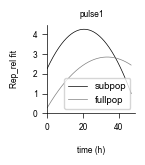

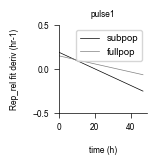

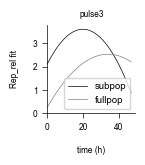

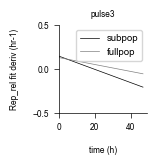

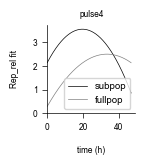

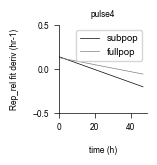

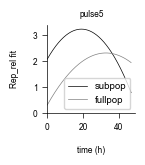

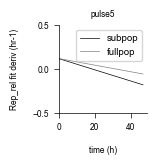

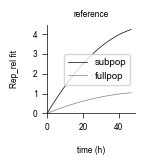

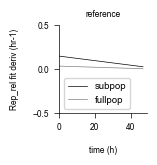

In [9]:
repo_path = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/"
pulse_exp = "Pulse_pop/Experiment_synTF1&2/for_paper/"
all_cell_exp_200 = pd.read_pickle(repo_path+pulse_exp+"200-cell_all_cells_exp.pkl")
run_spline_fitting(repo_path+pulse_exp+"filtered_70pct_deg2/", ["pulse1", "pulse3", "pulse4", "pulse5", "reference"], all_cell_exp_200, Z_200_df, 70)

## Supplementary Figure 10: Pulse GA search space vs. combinatorial search

In [ ]:
path_pulse_combinatorial = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Combinatorial_search/pulse_all_obj_dsred1.pkl"
path_pulse_combo_pareto = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Combinatorial_search/pulse_tpulse_pareto_dsred1_final.pkl"
# path_pulse_GA_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse/Optimized_hyperparams_fixed_pop_max_hv/2024-10-09_Pulse_single_DsRED_t_pulse_opt_hps_ngen80_seed_5/"
path_pulse_GA_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse_fixed_pop_max_hv/run2_ngen10000/2025-03-13_Pulse_single_DsRED_t_pulse_opt_hps_ngen100_seed_6/"
fname_GA = "all_objectives.pkl"
fname_GA_pareto = "final_objectives_df.pkl"
fname_GA_unique = "all_unique_objs_100.pkl"

# with open(path_pulse_GA_single+fname_GA, "rb") as fid:
#     all_obj = pickle.load(fid)
# all_obj_100 = all_obj[:20200]
# all_unique_objs_100 = np.unique(all_obj_100, axis=0, return_index=False)

# with open(path_pulse_GA_single + fname_GA_unique, "wb") as fid:
#     pickle.dump(all_unique_objs_100, fid)

with open(path_pulse_combinatorial, "rb") as fid:
    pulse_combinatorial = pickle.load(fid)
pulse_all_objs_df = pd.DataFrame(abs(pulse_combinatorial), columns=["t_pulse", "peak_rel", "prominence_rel"])
# display(pulse_all_objs_df)
# plt.plot(pulse_all_objs_df["t_pulse"], pulse_all_objs_df["prominence_rel"], linestyle="none", marker="o", markersize=0.5)
# plt.show()

with open(path_pulse_combo_pareto, "rb") as fid:
    pulse_combo_pareto = pickle.load(fid)
pulse_pareto_objs_df = pd.DataFrame(abs(pulse_combo_pareto), columns=["t_pulse", "prominence_rel"])

with open(path_pulse_GA_single+fname_GA_unique, "rb") as fid:
    unique_objs = pickle.load(fid)
unique_objs = abs(unique_objs)
unique_objs_df = pd.DataFrame(unique_objs, columns=["t_pulse", "prominence_rel"])


GA_objs = pd.read_pickle(path_pulse_GA_single+fname_GA_pareto)
# display(GA_objs)
GA_objs = abs(GA_objs)

# plt.plot(GA_objs["t_pulse"], GA_objs["prominence_rel"], linestyle="none", marker="o", markersize=2)#, zorder=10)
# plt.plot(unique_objs_df["t_pulse"], unique_objs_df["prominence_rel"], linestyle="none", marker="o", markersize=1.5)
# plt.plot(pulse_pareto_objs_df["t_pulse"], pulse_pareto_objs_df["prominence_rel"], linestyle="none", marker="o", markersize=2)
# plt.show()

# plot_pareto_comparison(path_pulse_GA_single+"GA_search_space_paper.svg", unique_objs_df, GA_objs, ["t_pulse", "prominence_rel"])
# plot_pareto_comparison(path_pulse_GA_single+"pareto_comparison_paper.svg", pulse_pareto_objs_df, GA_objs, ["t_pulse", "prominence_rel"])

## ***Supplementary Figure 11: Pulse experimental plasmid uptake threshold for pulse behavior

## Supplementary Figure 12: pEnd characterization using reference case dox dose-response

In [ ]:
dox = [0, 5.011872336272722, 7.943282347242816, 0.3981071705534972, 0.6309573444801932, 
       1, 1.5848931924611136, 2.511886432, 3.9810717055349722, 6.309573444801933, 10,
       15.848931924611133, 25.118864315095795, 39.810717055349734, 63.09573444801933, 100]
MEFLs = [447479.8795885249, 23255976.946826715, 70840848.77692752, 509626.6853615729, 
        1160274.9714673548, 626188.1239869102, 1654115.8666059247, 3626468.111563251, 
        13799420.880309809, 33792679.02607624, 105681140.21534804, 147324624.77849075, 
        182036575.77164078, 143984870.35957584, 213604017.49083412, 224513083.06387034]
MEFLs_scaled = [i/1E8 for i in MEFLs]
MEFLs_stderr = [42426.735446439736, 3024524.7966865567, 9523827.893799337, 20120.29130572459, 
                579507.2788822807, 55732.67235114641, 78942.46945357564, 350612.8806741071, 
                2350324.4521878795, 6006171.734513734, 5474839.214213582, 2934320.8583848705, 
                7533260.075501128, 6727375.724475208, 6262844.7219046205, 6302605.568264454]
MEFLs_stderr_scaled = [i/1E8 for i in MEFLs_stderr]

fig, ax = plt.subplots(1, 1, figsize=(2.25, 2.25))
# ax.plot(dox, MEFLs_scaled, linestyle="none", marker="o")
(_, caps, _) = ax.errorbar(dox[:11], y=MEFLs_scaled[:11], yerr=MEFLs_stderr_scaled[:11], color=grey_, linestyle="none", marker="o", markersize="1.5", ecolor="k", elinewidth=0.5, capsize=1.5)
# ax.plot(dox[6:8], MEFLs_scaled[6:8], color="r")
ax.set_xscale("symlog")
ax.set_xlim(left=0)
ax.set_xlabel("Dox concentration (ng/mL)")
ax.set_ylim(bottom=0)
ax.set_yticks([0, 0.5, 1])
ax.set_ylabel("Reporter expression (x10^8 MEFLs)")

for cap in caps:
        cap.set_markeredgewidth(0.5)

# plt.savefig("/Users/kdreyer/Desktop/dox_dose-response_ref.svg")